In [19]:
from main import MyPaddleOCR
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image
import IPython

최초에 한번은 Model을 다운로드 합니다. 경로는 Windows의 경우 C:/paddleocr/whl/rec/korean이고 Mac OS의 경우는 ~/.paddleocr/whl/rec/korean 입니다.

**Examples** 
```python
ocr = MyPaddleOCR()
ocr.run_ocr(IMAGE_PATH, debug=True)
```

In [6]:
# Declare an augmentation pipeline
transform = A.Compose([
    #A.Resize(height = 512, width = 512),
    A.RandomResizedCrop(p=1, height= 820 ,width= 820, scale=(0.65, 0.95),ratio=(0.90, 1.10)),
    A.RandomBrightnessContrast(always_apply=True, p=1.0, brightness_limit=(-0.4, 0.4), contrast_limit=(-0.4, 0.4), brightness_by_max=False),
    A.SafeRotate(always_apply=True, p=0.5, limit=(-10, 40), interpolation=2, border_mode=0, value=(0, 0, 0), mask_value=None),
    #A.HorizontalFlip(always_apply=False, p=0.5),
    A.CenterCrop(always_apply=True, p=1, height=512, width=512)
    #    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0, p=1.0)
    #A.pytorch.transforms.ToTensorV2()
])
transform_o = A.Compose([
    A.Resize(height = 400, width = 256)
])

In [13]:
med = 'zeromin'
img_path = './test_data/'+med+'.png'
save_path = './Data/preprocessed_img/'

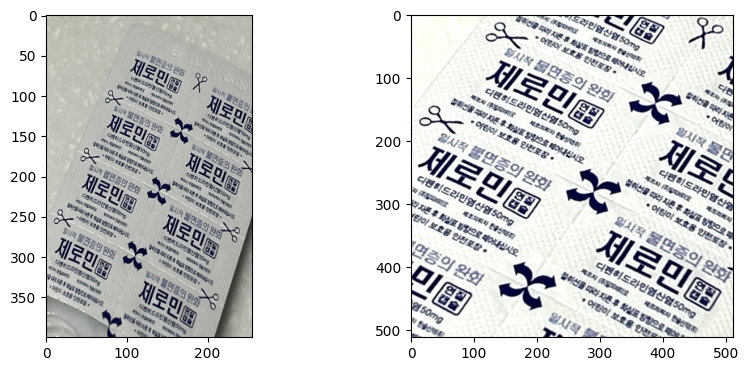

In [11]:

plt.figure(figsize=(10,200))
im_bgr = cv2.imread(img_path)
img = im_bgr[:, :, ::-1]

transformed_img = transform(image=img)["image"]

plt.subplot(40,2,1)
plt.imshow(transform_o(image=img)['image'], cmap=plt.cm.binary)
plt.grid(False)
plt.subplot(40,2,2)

plt.imshow(transformed_img, cmap=plt.cm.binary)
plt.show()

In [14]:
img_array = Image.fromarray(transformed_img.astype(np.uint8))
file_name = f"{med}_preprocessed.jpg"
img_array.save(os.path.join(save_path,file_name))

In [15]:
ocr = MyPaddleOCR()

[2023/11/11 12:30:32] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/hojun/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/hojun/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_le

[2023/11/11 12:30:39] ppocr DEBUG: dt_boxes num : 72, elapsed : 2.2462897300720215
[2023/11/11 12:30:40] ppocr DEBUG: rec_res num  : 72, elapsed : 0.28595709800720215
타리자는부화십도
어린이
사보차회차
엄시작
보호동
방으로:
제로
돌면중의
안민포장
타어내십니오
디렌히드라민염산염5ong
민엄
완회
다든
부보차
수호
무로
:어L이/
어린이보호용
사로차
엄시직
일시적
제로민팥
안편표장:
태야나십시오
제로
물면증의
물면
완화
디렌히드라민임산임
디렌히드라민염산염5omg
페부차
호
이e오 ue 방u으로
어림이보호용
페보력회시
/E/이/보보용
래보차드자
일시/적
안진모장:
페어나십시오
제로
물면증의
안전포장
연증의
완회
디렌히드라민염산염50rng
민엄
완화
250rig
어린이
화상트
채즈회로차
입시적
보호옹
빔향으로적
안면


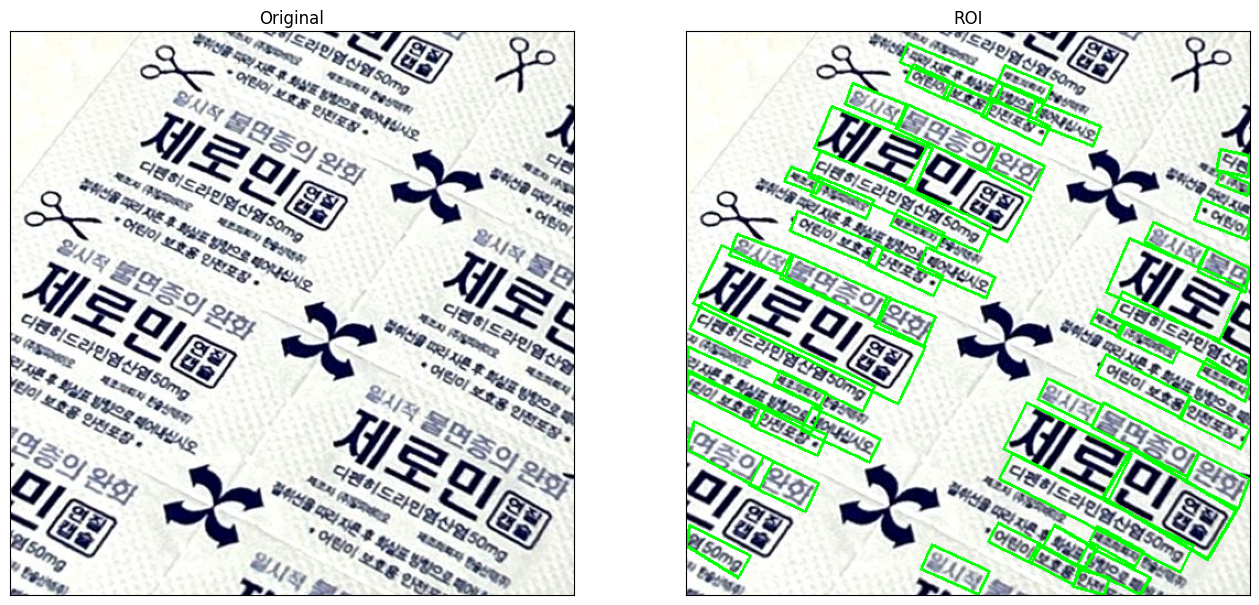

['타리자는부화십도',
 '어린이',
 '사보차회차',
 '엄시작',
 '보호동',
 '방으로:',
 '제로',
 '돌면중의',
 '안민포장',
 '타어내십니오',
 '디렌히드라민염산염5ong',
 '민엄',
 '완회',
 '다든',
 '부보차',
 '수호',
 '무로',
 ':어L이/',
 '어린이보호용',
 '사로차',
 '엄시직',
 '일시적',
 '제로민팥',
 '안편표장:',
 '태야나십시오',
 '제로',
 '물면증의',
 '물면',
 '완화',
 '디렌히드라민임산임',
 '디렌히드라민염산염5omg',
 '페부차',
 '호',
 '이e오 ue 방u으로',
 '어림이보호용',
 '페보력회시',
 '/E/이/보보용',
 '래보차드자',
 '일시/적',
 '안진모장:',
 '페어나십시오',
 '제로',
 '물면증의',
 '안전포장',
 '연증의',
 '완회',
 '디렌히드라민염산염50rng',
 '민엄',
 '완화',
 '250rig',
 '어린이',
 '화상트',
 '채즈회로차',
 '입시적',
 '보호옹',
 '빔향으로적',
 '안면']

In [16]:
img_path = os.path.join(save_path,file_name)
ocr.run_ocr(img_path, debug=True)

In [20]:
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

: 

In [17]:
ocr.get_available_models()

#1 Model Vesion : [PP-OCRv4] - Language : ['ch', 'en', 'korean', 'japan', 'chinese_cht', 'ta', 'te', 'ka', 'latin', 'arabic', 'cyrillic', 'devanagari']
#2 Model Vesion : [PP-OCRv3] - Language : ['ch', 'en', 'korean', 'japan', 'chinese_cht', 'ta', 'te', 'ka', 'latin', 'arabic', 'cyrillic', 'devanagari']
#3 Model Vesion : [PP-OCRv2] - Language : ['ch']
#4 Model Vesion : [PP-OCR] - Language : ['ch', 'en', 'french', 'german', 'korean', 'japan', 'chinese_cht', 'ta', 'te', 'ka', 'latin', 'arabic', 'cyrillic', 'devanagari', 'structure']


In [5]:
ocr.get_available_langs()

Available Language : ['ch', 'en', 'korean', 'japan', 'chinese_cht', 'ta', 'te', 'ka', 'latin', 'arabic', 'cyrillic', 'devanagari', 'french', 'german', 'structure']


In [42]:
ocr.get_ocr_result()

[[[[297.0, 246.0], [388.0, 246.0], [388.0, 272.0], [297.0, 272.0]],
  ('아래한글', 0.9990288019180298)],
 [[[398.0, 247.0], [485.0, 247.0], [485.0, 272.0], [398.0, 272.0]],
  ('한글문서', 0.9990617036819458)],
 [[[297.0, 275.0], [363.0, 277.0], [362.0, 304.0], [296.0, 302.0]],
  ('디자인', 0.9998207092285156)],
 [[[632.0, 354.0], [701.0, 354.0], [701.0, 377.0], [632.0, 377.0]],
  ('202204', 0.9998807907104492)]]